# 6.4 Machine Learning_ Regression Analysis.ipynb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create path 
path = r'/Users/milenafagandini/Desktop/Airbnb /02 Data '

In [5]:
# Import airbnb data 
df = pd.read_csv(os.path.join(path, 'dataset_cleaned.csv'), index_col = False)

#### We just cleaned this data set in the past exercise, so I will be using that file 

### 3. Data prep for regression analysis 

<Figure size 800x600 with 0 Axes>

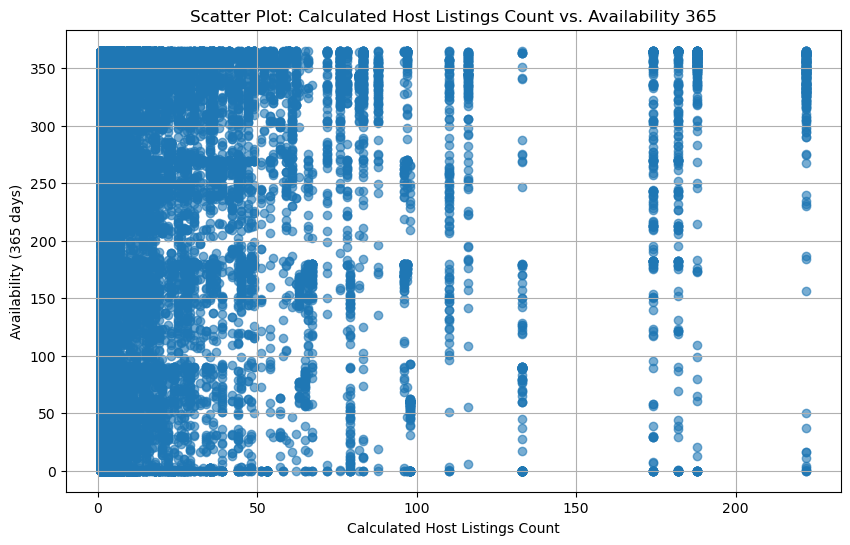

In [21]:

# Scatterplot for "calculated_host_listings_count" vs. "availability_365"
if 'calculated_host_listings_count' in df.columns and 'availability_365' in df.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['calculated_host_listings_count'], df['availability_365'], alpha=0.6)
    plt.xlabel('Calculated Host Listings Count')
    plt.ylabel('Availability (365 days)')
    plt.title('Scatter Plot: Calculated Host Listings Count vs. Availability 365')
    plt.grid(True)
    plt.show()
else:
    print("Required columns are not present in the dataset.")


In [25]:

# Reshape the variables into NumPy arrays
X = df['calculated_host_listings_count'].values.reshape(-1, 1)
y = df['availability_365'].values.reshape(-1, 1)



In [27]:
X

array([[ 1],
       [ 6],
       [ 1],
       ...,
       [88],
       [11],
       [22]])

In [29]:
y

array([[300],
       [ 44],
       [  0],
       ...,
       [351],
       [173],
       [354]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

#### Null Hypothesis (H₀): There is no linear relationship between Calculated Host Listings Count and Availability 365. In other words, the regression slope is zero (β = 0).

#### Alternative Hypothesis (H₁): There is a linear relationship between Calculated Host Listings Count and Availability 365, meaning the slope is not zero (β ≠ 0).

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)


LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

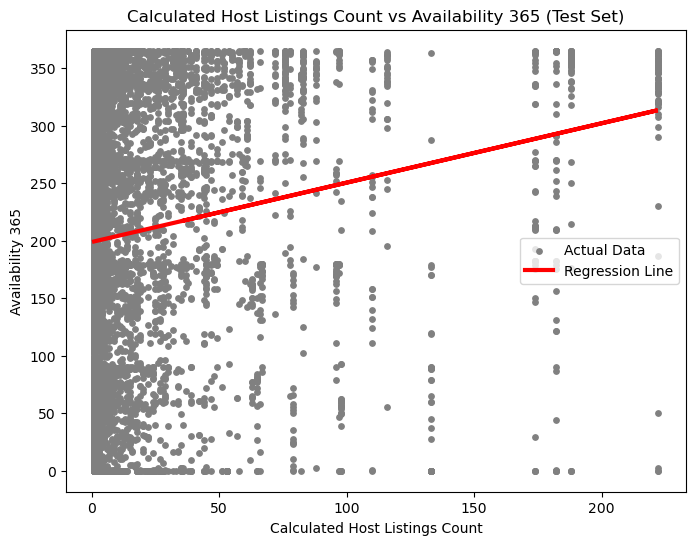

In [39]:

# Create a plot showing the regression line on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='gray', s=15, label="Actual Data")
plt.plot(X_test, y_predicted, color='red', linewidth=3, label="Regression Line")
plt.title("Calculated Host Listings Count vs Availability 365 (Test Set)")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Availability 365")
plt.legend()
plt.show()

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51606988]]
Mean squared error:  15601.062910522744
R2 score:  0.018585245119354


## Takeaways 
### The slope of approximately 0.516 indicates that for every 1-unit increase in your predictor (e.g., calculated_host_listings_count), the predicted availability_365 increases by about 0.52 units.
### An R2 of about 0.0186 (1.86%) means that only about 1.86% of the variance in the target variable (availability_365) is explained by the model.
### The MSE of 15,601.06 suggests that, on average, your predictions deviate from the true values by a considerable margin (when measured in squared-error terms).

In [46]:
y_predicted

array([[199.24931517],
       [206.47429346],
       [199.24931517],
       ...,
       [200.7975248 ],
       [199.24931517],
       [217.31176091]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,179,199.249315
1,342,206.474293
2,270,199.249315
3,350,215.763551
4,365,208.538573
5,209,229.181368
6,365,209.054643
7,176,200.281455
8,345,199.765385
9,56,200.281455


##### Compare how the regression fits the training set

In [53]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [55]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51606988]]
Mean squared error:  15625.763412879642
R2 score:  0.019379174783672792


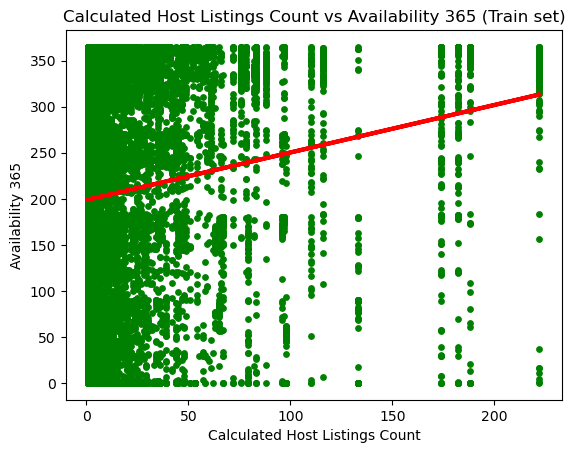

In [62]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('Calculated Host Listings Count vs Availability 365 (Train set)')
plot_test.xlabel('Calculated Host Listings Count')
plot_test.ylabel('Availability 365')
plot_test.show()


## More takeaways 
### Running it on the trainig set confirms our previous conclusions that the relationship we were exploring is not purely linear